In [145]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [93]:
tokenizer = Tokenizer()

data = open('21_irish-lyrics-eof.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)


448, 'addle': 1449, 'brain': 1450, 'ringin': 1451, 'glamour': 1452, 'gas': 1453, 'guff': 1454, 'whisper': 1455, 'oil': 1456, 'remarkable': 1457, 'policeman': 1458, 'bluff': 1459, 'maintain': 1460, 'guril': 1461, 'sic': 1462, 'passage': 1463, 'rough': 1464, 'borne': 1465, 'breeze': 1466, 'boundless': 1467, 'stupendous': 1468, 'roll': 1469, 'thundering': 1470, 'motion': 1471, 'mermaids': 1472, 'fierce': 1473, 'tempest': 1474, 'gathers': 1475, 'oneill': 1476, 'odonnell': 1477, 'lucan': 1478, 'oconnell': 1479, 'brian': 1480, 'drove': 1481, 'danes': 1482, 'patrick': 1483, 'vermin': 1484, 'whose': 1485, 'benburb': 1486, 'blackwater': 1487, 'owen': 1488, 'roe': 1489, 'munroe': 1490, 'lambs': 1491, 'skip': 1492, 'views': 1493, 'enchanting': 1494, 'rostrevor': 1495, 'groves': 1496, 'lakes': 1497, 'ride': 1498, 'tide': 1499, 'majestic': 1500, 'shannon': 1501, 'sail': 1502, 'loch': 1503, 'neagh': 1504, 'ross': 1505, 'gorey': 1506, 'saxon': 1507, 'tory': 1508, 'soil': 1509, 'sanctified': 1510, 'en

In [94]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i + 1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:, :-1],input_sequences[:, -1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [95]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [96]:
xs[6], ys[6]

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32))

In [97]:
[x for x in tokenizer.word_index.items()][:10]

[('the', 1),
 ('and', 2),
 ('i', 3),
 ('to', 4),
 ('a', 5),
 ('of', 6),
 ('my', 7),
 ('in', 8),
 ('me', 9),
 ('for', 10)]

In [137]:
model = Sequential([
    Embedding(total_words, 128, input_length=max_sequence_len - 1),
    Bidirectional(LSTM(64, return_sequences=True)),
    model.add(Dropout(0.2)),
    Bidirectional(LSTM(64)),
    model.add(Dropout(0.2)),
    Dense(total_words, activation='softmax')
])

adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')

In [151]:
model = Sequential()
model.add(Embedding(total_words, 128, input_length=max_sequence_len - 1),)
model.add(LSTM(256, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256))
model.add(Dropout(0.2))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [152]:
print(model.summary())

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_27 (Embedding)     (None, 15, 128)           344320    
_________________________________________________________________
lstm_39 (LSTM)               (None, 15, 256)           394240    
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 256)           0         
_________________________________________________________________
lstm_40 (LSTM)               (None, 256)               525312    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 2690)              691330    
Total params: 1,955,202
Trainable params: 1,955,202
Non-trainable params: 0
___________________________________________

In [153]:
history = model.fit(xs, ys, epochs=40)
print(model)

Epoch 1/40
377/377 [==============================] - 5s 6ms/step - loss: 6.7063 - accuracy: 0.0648
Epoch 2/40
377/377 [==============================] - 2s 6ms/step - loss: 6.3191 - accuracy: 0.0694
Epoch 3/40
377/377 [==============================] - 2s 7ms/step - loss: 6.1870 - accuracy: 0.0784
Epoch 4/40
377/377 [==============================] - 3s 7ms/step - loss: 6.0505 - accuracy: 0.0818
Epoch 5/40
377/377 [==============================] - 3s 7ms/step - loss: 5.8747 - accuracy: 0.0927
Epoch 6/40
377/377 [==============================] - 2s 7ms/step - loss: 5.7044 - accuracy: 0.1042
Epoch 7/40
377/377 [==============================] - 2s 7ms/step - loss: 5.5408 - accuracy: 0.1090
Epoch 8/40
377/377 [==============================] - 2s 7ms/step - loss: 5.3948 - accuracy: 0.1146
Epoch 9/40
377/377 [==============================] - 2s 7ms/step - loss: 5.2608 - accuracy: 0.1214
Epoch 10/40
377/377 [==============================] - 3s 7ms/step - loss: 5.1209 - accuracy: 0.1273

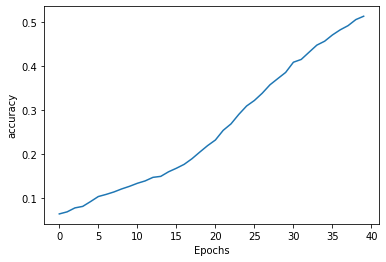

In [154]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, 'accuracy')

In [155]:
seed_text = "chick the me out"
next_words = 11
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list))
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word

print(seed_text)

chick the me out of the morning early is the cliffs of doneen leane again
